# Aula de K-Nearest Neighbors (KNN)

Ol√°, cientista de Dados!

Seja bem-vindo(a) √† nossa aula sobre o **K-Nearest Neighbors (KNN)**, ou K-Vizinhos Mais Pr√≥ximos.

### Uma Analogia Simples

Imagine que voc√™ se mudou para um bairro novo e quer decidir se vai comprar um carro el√©trico ou um a combust√£o. Uma abordagem seria olhar para os seus **5 vizinhos mais pr√≥ximos (K=5)** e ver o que a maioria deles tem. Se 3 t√™m carros el√©tricos e 2 t√™m carros a combust√£o, voc√™ provavelmente se inclinaria a comprar um el√©trico.

O KNN funciona exatamente assim! Ele √© um algoritmo "pregui√ßoso" (lazy learner) porque n√£o aprende uma "f√≥rmula" complexa, mas sim memoriza todos os dados de treino e, para classificar um novo ponto, ele olha para a classe da maioria dos seus vizinhos mais pr√≥ximos.

Simples, n√£o √©? Agora, vamos ver os detalhes por tr√°s dessa ideia.

<img src='knn.png'/>


### Os Conceitos Fundamentais (Teoria Primeiro!)

Antes de pularmos para o c√≥digo, vamos entender as tr√™s pe√ßas-chave do quebra-cabe√ßa do KNN.

#### 1.1 Medindo a "Proximidade": A Dist√¢ncia Euclidiana

Para encontrar os "vizinhos mais pr√≥ximos", precisamos de uma forma de medir a dist√¢ncia entre dois pontos. A mais comum √© a **Dist√¢ncia Euclidiana**.

A f√≥rmula parece complicada, mas a ideia √© a mesma do Teorema de Pit√°goras. Para dois pontos, `p` e `q`, em um espa√ßo com `n` dimens√µes (ou `n` caracter√≠sticas), a dist√¢ncia √©:

$$d(p, q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \dots + (p_n - q_n)^2}$$

**Exemplo "M√£o na Massa" (Matem√°tica):**
Vamos prever se um novo cliente (ponto `p`) vai comprar um produto com base na sua idade e sal√°rio.

-   **Novo Cliente (p):** Idade = 42, Sal√°rio = 50.000
-   **Vizinho 1 (q1):** Idade = 38, Sal√°rio = 60.000
-   **Vizinho 2 (q2):** Idade = 25, Sal√°rio = 45.000

Dist√¢ncia para o Vizinho 1:
$d(p, q1) = \sqrt{(42 - 38)^2 + (50000 - 60000)^2} = \sqrt{(4)^2 + (-10000)^2} = \sqrt{16 + 100.000.000} \approx 10.000$

Dist√¢ncia para o Vizinho 2:
$d(p, q2) = \sqrt{(42 - 25)^2 + (50000 - 45000)^2} = \sqrt{(17)^2 + (5000)^2} = \sqrt{289 + 25.000.000} \approx 5.000$

**Conclus√£o:** O **Vizinho 2** est√° "mais pr√≥ximo" do nosso novo cliente.


#### 1.2 Dist√¢ncia Manhattan (L1)

$$
d(\vec{x}, \vec{y}) = \sum_{i=1}^{n} |x_i - y_i|
$$

Soma das diferen√ßas absolutas. Tamb√©m chamada de **dist√¢ncia do t√°xi** (movimento em grade, como ruas de uma cidade).

<img src='dist_manhattan.png'/>





#### 2. A Import√¢ncia de Normalizar os Dados (Feature Scaling)

Percebeu um problema no nosso c√°lculo? O sal√°rio, por ter uma escala muito maior (milhares), dominou completamente a dist√¢ncia! A diferen√ßa de idade quase n√£o fez c√≥cegas no resultado.

Isso √© um grande problema para o KNN. Se n√£o colocarmos todas as nossas caracter√≠sticas (features) na mesma escala, o algoritmo dar√° uma import√¢ncia desproporcional para as features com valores maiores.

Por isso, a **normaliza√ß√£o/padroniza√ß√£o dos dados √© uma etapa OBRIGAT√ìRIA** antes de usar o KNN.

#### 3. Como Escolher o Melhor Valor de "K"?

A escolha do `K` (o n√∫mero de vizinhos) √© crucial e afeta diretamente o nosso modelo.

-   **K pequeno (ex: K=1):** O modelo se torna muito sens√≠vel a ru√≠dos e pontos an√¥malos. Ele pode "superajustar" (overfitting) aos dados de treino, criando uma fronteira de decis√£o muito complexa.
-   **K grande (ex: K=40):** O modelo se torna muito "suave" e pode ignorar padr√µes locais importantes. Ele pode "subajustar" (underfitting), sendo simples demais para capturar a complexidade dos dados.

Isso √© o famoso **trade-off entre vi√©s e vari√¢ncia**. Como encontrar um bom equil√≠brio? Usaremos uma t√©cnica chamada **M√©todo do Cotovelo (Elbow Method)**, que vamos implementar na pr√°tica! A ideia √© testar v√°rios valores de K e escolher aquele onde a taxa de erro para de diminuir drasticamente.

### Aplica√ß√£o Pr√°tica: Previs√£o de Compra

Agora que a teoria est√° clara, vamos aplicar o KNN para prever se um cliente ir√° comprar um produto com base em sua idade e sal√°rio estimado.

#### Passo 1: Prepara√ß√£o do Ambiente e Carregamento dos Dados

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando o conjunto de dados
df = pd.read_csv('Social_Network_Ads.csv')

# Exibindo as 5 primeiras linhas
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

#### Passo 2: An√°lise Explorat√≥ria e Limpeza

Vamos entender e preparar nossos dados.

In [11]:
# A coluna 'User ID' √© um identificador √∫nico, n√£o ajuda na previs√£o.
# A coluna 'Gender' poderia ser usada, mas para simplificar este primeiro exerc√≠cio, vamos remov√™-la.
df = df.drop(columns=['User ID', 'Gender'])

# Vamos verificar as informa√ß√µes do nosso dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


Os dados est√£o limpos e sem valores nulos. Vamos visualizar a rela√ß√£o entre idade, sal√°rio e a decis√£o de compra.

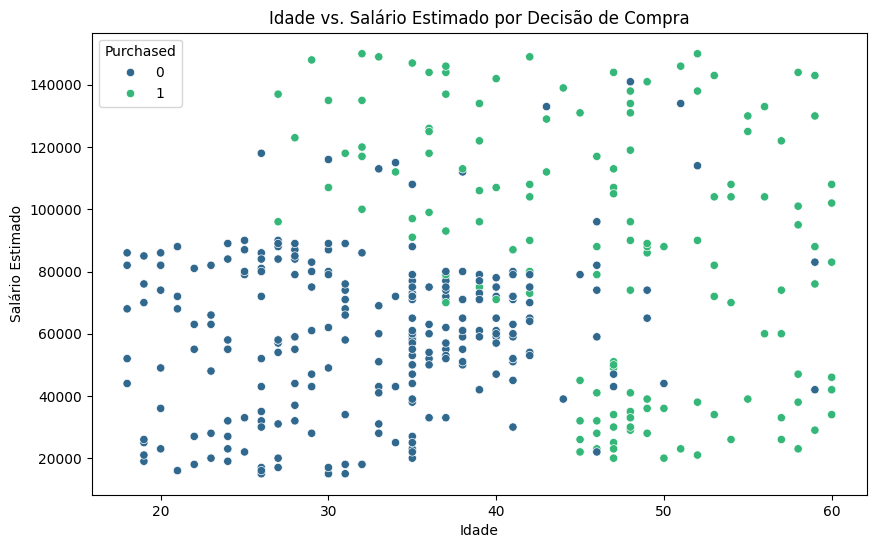

In [12]:
# Criando um gr√°fico de dispers√£o para visualizar os dados
# Eixo X: Idade, Eixo Y: Sal√°rio, Cor: Comprou (0=N√£o, 1=Sim)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', palette='viridis')
plt.title('Idade vs. Sal√°rio Estimado por Decis√£o de Compra')
plt.xlabel('Idade')
plt.ylabel('Sal√°rio Estimado')
plt.show()

O gr√°fico nos d√° uma boa intui√ß√£o: parece haver um padr√£o onde pessoas mais velhas e com sal√°rios mais altos (grupo verde/azul no canto superior direito) tendem a comprar mais. O KNN tentar√° aprender essa fronteira de decis√£o.

#### Passo 3: Pr√©-Processamento dos Dados

In [13]:
# Separando as features (X) da vari√°vel alvo (y)
X = df.drop(columns='Purchased',axis=1)
y = df['Purchased']

In [14]:
# Divis√£o em dados de Treino e Teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
# Normaliza√ß√£o/Padroniza√ß√£o dos Dados (Passo Obrigat√≥rio para o KNN!)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# ATEN√á√ÉO: Ajustamos o scaler APENAS nos dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# E usamos o mesmo scaler para transformar os dados de teste
X_test_scaled = scaler.transform(X_test)

#### Passo 4: Encontrando o Melhor Valor de K (M√©todo do Cotovelo)

Vamos testar o modelo com diferentes valores de K (de 1 a 40) e plotar a taxa de erro para cada um. O "cotovelo" do gr√°fico nos indicar√° um bom valor para K.

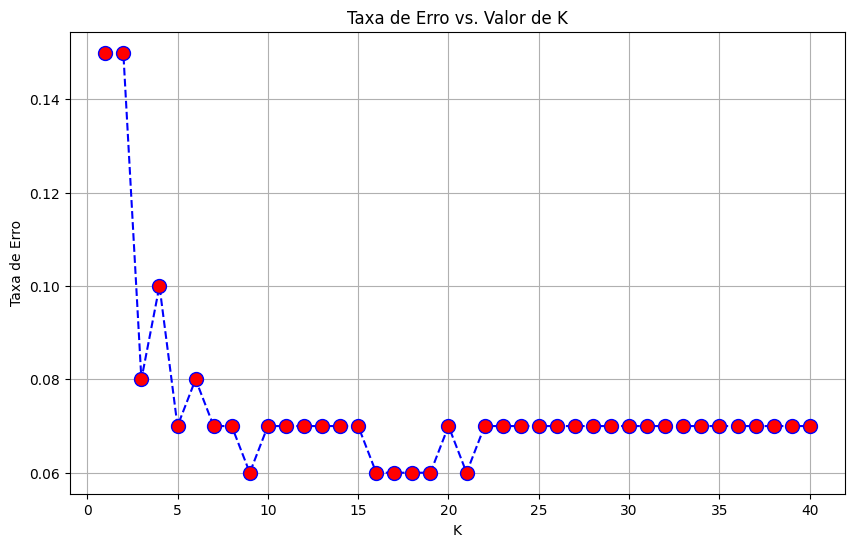

In [17]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

# Loop para testar K de 1 a 40
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    # Calcula a m√©dia dos erros (onde a previs√£o foi diferente do real)
    error_rate.append(np.mean(pred_i != y_test))

# Plotando o gr√°fico
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Taxa de Erro vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Taxa de Erro')
plt.grid(True)
plt.show()

Analisando o gr√°fico, vemos que a taxa de erro √© alta para valores de K muito baixos e se estabiliza a partir de K=9, atingindo um ponto √≥timo por volta de K=11. Vamos escolher **K=11** para o nosso modelo final, pois √© um bom ponto de equil√≠brio antes que a taxa de erro comece a subir novamente.

#### Passo 5: Treinamento e Avalia√ß√£o do Modelo Final

In [18]:
# Criando e treinando o modelo final com K=11
knn_final = KNeighborsClassifier(n_neighbors=11)
knn_final.fit(X_train_scaled, y_train)

# Fazendo as previs√µes
y_pred = knn_final.predict(X_test_scaled)

--- Matriz de Confus√£o ---


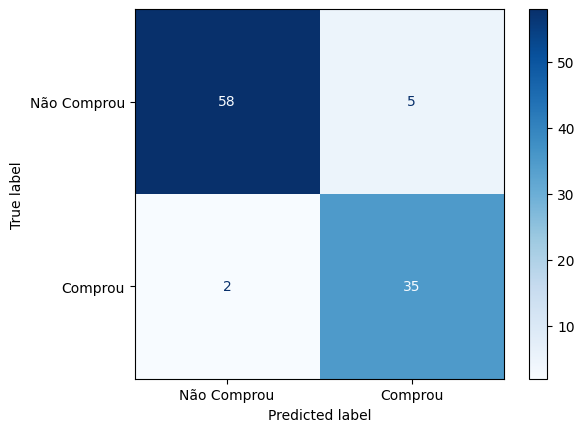


--- Relat√≥rio de Classifica√ß√£o ---
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.88      0.95      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [19]:
# Avaliando o modelo com a Matriz de Confus√£o e o Relat√≥rio de Classifica√ß√£o
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

print("--- Matriz de Confus√£o ---")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['N√£o Comprou', 'Comprou'])
disp.plot(cmap='Blues')
plt.show()


print("\n--- Relat√≥rio de Classifica√ß√£o ---")
print(classification_report(y_test, y_pred))

### Resumo: Pr√≥s e Contras do KNN

Para finalizar, √© sempre bom ter em mente as for√ßas e fraquezas de cada algoritmo.

#### Vantagens üëç
* **Simples e Intuitivo:** F√°cil de entender e implementar.
* **N√£o requer treinamento:** O algoritmo √© "pregui√ßoso", ele apenas armazena os dados. A computa√ß√£o ocorre no momento da previs√£o.
* **Flex√≠vel:** Pode ser usado tanto para classifica√ß√£o quanto para regress√£o.
* **N√£o-linear:** Consegue aprender fronteiras de decis√£o complexas.

#### Desvantagens üëé
* **Custo Computacional:** Fica muito lento e caro (em termos de mem√≥ria e processamento) em conjuntos de dados muito grandes, pois precisa calcular a dist√¢ncia para todos os pontos a cada nova previs√£o.
* **Sens√≠vel a Features Irrelevantes:** Se tivermos muitas colunas que n√£o ajudam na previs√£o, elas podem "poluir" o c√°lculo da dist√¢ncia e piorar o resultado.
* **Requer Normaliza√ß√£o:** Como vimos, √© obrigat√≥rio colocar os dados na mesma escala.
* **Maldi√ß√£o da Dimensionalidade:** O conceito de "dist√¢ncia" se torna menos √∫til em espa√ßos com muitas dimens√µes (muitas features).

Parab√©ns por concluir esta aula! O KNN √© uma excelente ferramenta para se ter no seu arsenal.